# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
weatherPraga[order(weatherPraga$PRCP,decreasing=T),c("DATE","PRCP")][1:10,]

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)


Call:
lm(formula = EMNT ~ DATE, data = min_temp)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.00664    9.17007  -5.235 3.74e-07 ***
DATE          0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


Loading required package: ggplot2


[1] "De media, la temperatura minima sube cada año  0.017  grados centígrados"


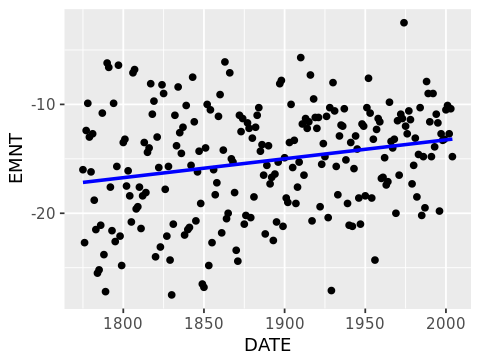

In [3]:
# preparamos los datos
min_temp <- weatherPraga[,c("DATE","EMNT")]

# construimos el modelo
model<-lm(data=min_temp, formula = EMNT ~ DATE )
summary(model)

# realizamos la predicción
temp_predicted <- predict(model,min_temp)

# hacemos la gráfica
require(ggplot2)
# Tamaño del gráfico en Jupyter
options(repr.plot.width=4,repr.plot.height=3)

ggplot(data = min_temp,aes(x=DATE,y=EMNT)) + 
        geom_point() +
        geom_line(aes(y=temp_predicted),color="blue", lwd=1)

# Tamaño del gráfico en Jupyter
options(repr.plot.width=7,repr.plot.height=7)

print(paste("De media, la temperatura minima sube cada año ",round(model$coefficients[["DATE"]],3)," grados centígrados"))

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [4]:
# Sabemos que los datos están ordenados por año
rango1 = min_temp[which(min_temp$DATE == 1775):which(min_temp$DATE == 1794),"EMNT"]
rango2 = min_temp[which(min_temp$DATE == 1985):which(min_temp$DATE == 2004),"EMNT"]
media1 <- mean(rango1)
media2 <- mean(rango2)

print(paste("La temperatura minima media entre 1775 y 1794 fue de", media1, "grados"))
print(paste("La temperatura minima media entre 1985 y 2004 fue de", media2, "grados"))
print(paste("Por tanto hay una diferencia de ", media2 - media1, "grados"))

[1] "La temperatura minima media entre 1775 y 1794 fue de -16.935 grados"
[1] "La temperatura minima media entre 1985 y 2004 fue de -13.04 grados"
[1] "Por tanto hay una diferencia de  3.895 grados"


Veamos si este aumento de casi 4 grados de la temperatura minima es estadisticamente significativo.
Para hacernos una idea de la función de distribución que podría seguir cada uno de los rangos, vamos a pintarlas.

Loading required package: reshape2
No id variables; using all as measure variables


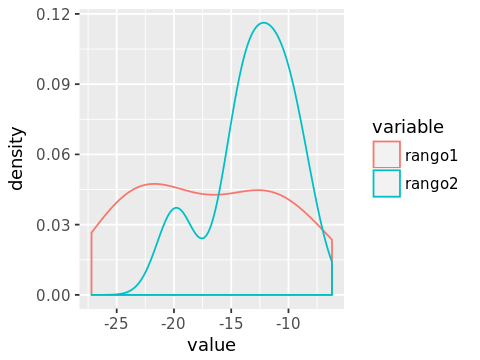

In [5]:
df <- data.frame(rango1,rango2)

require(reshape2)
options(repr.plot.width=4,repr.plot.height=3)
ggplot(data = melt(df),aes(x=value, color=variable)) + geom_density()
options(repr.plot.width=7,repr.plot.height=7)

Vemos que el rango1 se asemeja mas a una uniforme y que el rango2 podrian ser dos normales. En cualquier caso,teniendo solo 20 muestras es dificil asegurar la distribucion. De todas formas intentamos comprobar si se trata de distribuciones normales usando el test de Shapiro

In [6]:
paste("Las muestras de de temperatura del rango1 parecen seguir una gaussiana, pvalor=",shapiro.test(rango1)$p.value)
paste("Las muestras de de temperatura del rango2 no esta tan claro que siga gaussiana pero lo aceptaremos, pvalor=",shapiro.test(rango2)$p.value)
print("Asumiendo que se trata de dos gaussianas y que los dos rangos están relacionados (ya que, aunque en dos momentos distintos, se trata de la misma variable), aplicaremos el t-test emparejado ")
t.test(rango1,rango2,paired=TRUE)

[1] "Las muestras de de temperatura del rango1 parecen seguir una gaussiana, pvalor= 0.380826132704572"

[1] "Las muestras de de temperatura del rango2 no esta tan claro que siga gaussiana pero lo aceptaremos, pvalor= 0.0751036246207044"

[1] "Asumiendo que se trata de dos gaussianas y que los dos rangos están relacionados (ya que, aunque en dos momentos distintos, se trata de la misma variable), aplicaremos el t-test emparejado "



	Paired t-test

data:  rango1 and rango2
t = -2.4797, df = 19, p-value = 0.02269
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.1826393 -0.6073607
sample estimates:
mean of the differences 
                 -3.895 


**En este caso el pvalor es bastante bajo, de manera que podemos rechazar la hipótesis nula y asumir que ambas medias no son iguales y por tanto si es significativa la diferencia**

## Datos banco mundial

Carga los datos del banco mundial

In [7]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [8]:
# Primero veamos como son los datos que se han cargado
head(databank)
head(countryData)
head(indicators)

Country.Name,Country.Code,Indicator.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,
Aruba,ABW,Urban population (% of total),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,5.073000e+01,5.071500e+01,5.070000e+01,⋯,4.342100e+01,4.305900e+01,4.269800e+01,4.236400e+01,4.205800e+01,4.177900e+01,4.152800e+01,4.130400e+01,NA,NA
Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,2.876100e+04,2.892400e+04,2.908200e+04,⋯,4.405200e+04,4.377800e+04,4.357500e+04,4.345600e+04,4.339800e+04,4.336500e+04,4.333100e+04,4.329600e+04,NA,NA
Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,7.994038e-01,5.651398e-01,5.447726e-01,⋯,-7.305493e-01,-6.239346e-01,-4.647817e-01,-2.734659e-01,-1.335575e-01,-7.606930e-02,-7.843500e-02,-8.080622e-02,NA,NA
Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,5.669500e+04,5.703200e+04,5.736000e+04,⋯,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05,1.048220e+05,NA,NA
Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,8.324526e-01,5.926490e-01,5.734682e-01,⋯,9.861642e-02,2.126801e-01,3.769848e-01,5.121450e-01,5.929140e-01,5.874924e-01,5.246582e-01,4.599292e-01,NA,NA
Aruba,ABW,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),SI.POV.DDAY,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,Country.Code,Region,IncomeGroup,SpecialNotes,TableName,X
ABW,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Aruba,NA
AFG,AFG,South Asia,Low income,"Fiscal year end: March 20; reporting period for national accounts data is calendar year, estimated to insure consistency between national accounts and fiscal data. National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.",Afghanistan,NA
AGO,AGO,Sub-Saharan Africa,Lower middle income,,Angola,NA
ALB,ALB,Europe & Central Asia,Upper middle income,,Albania,NA
AND,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align with ISO code.,Andorra,NA
ARB,ARB,,,Arab World aggregate. Arab World is composed of members of the League of Arab States.,Arab World,NA


INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,X
SP.URB.TOTL.IN.ZS,Urban population (% of total),Urban population refers to people living in urban areas as defined by national statistical offices. The data are collected and smoothed by United Nations Population Division.,The United Nations Population Division's World Urbanization Prospects.,NA
SP.URB.TOTL,Urban population,Urban population refers to people living in urban areas as defined by national statistical offices. It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects. Aggregation of urban and rural population may not add up to total population because of different country coverages.,World Bank staff estimates based on the United Nations Population Division's World Urbanization Prospects.,NA
SP.URB.GROW,Urban population growth (annual %),Urban population refers to people living in urban areas as defined by national statistical offices. It is calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects.,"World Bank Staff estimates based on United Nations, World Urbanization Prospects.",NA
SP.POP.TOTL,"Population, total","Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates.","(1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Report (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",NA
SP.POP.GROW,Population growth (annual %),"Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage . Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship.","Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.",NA
SI.POV.DDAY,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Poverty headcount ratio at $1.90 a day is the percentage of the population living on less than $1.90 a day at 2011 international prices. As a result of revisions in PPP exchange rates, poverty rates for individual countries cannot be compared with poverty rates reported in earlier editions.","World Bank, Development Research Group. Data are based on primary household survey data obtained from government statistical agencies and World Bank country departments. Data for high-income economies are from the Luxembourg Income Study database. For more information and methodology, please see PovcalNet (http://iresearch.worldbank.org/PovcalNet/index.htm).",NA


In [9]:
# Creamos un nuevo dataframe filtrando por código de indicador y sacando solo las columnas que nos interesan
df_1970_CO_2 <- databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",c("1970","Country.Code","Country.Name")]
# Nos quedamos solo con los paises validos
df_1970_CO_2 <- merge(realCountryData,df_1970_CO_2,by="Country.Code")[,c("1970","Country.Name")]
# Buscamos cual es la fila que tiene el valor máximo de CO2
row_min <- df_1970_CO_2[which(max(df_1970_CO_2[,1],na.rm=T) == df_1970_CO_2[,1]),]

row_min

paste("El máximo de emisiones en 1970 fue de",row_min[,1],"toneladas en",row_min$Country.Name)

,1970,Country.Name
204,5400504,United States


[1] "El máximo de emisiones en 1970 fue de 5400503.5 toneladas en United States"

¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [10]:
# Creamos un nuevo dataframe filtrando por código de indicador y sacando solo las columnas que nos interesan
df_2012_CO_2 <- databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",c("2012","Country.Code","Country.Name")]
# Nos quedamos solo con los paises validos
df_2012_CO_2 <- merge(realCountryData,df_2012_CO_2,by="Country.Code")[,c("2012","Country.Name")]
# Ordenamos de forma descendente y cogemos la 5 primeras
top5_2012 <- df_2012_CO_2[order(df_2012_CO_2[,1],decreasing=T),][1:5,]
print("Top 5 en 2012")
top5_2012

paste("Todas ellas emitieron",round(sum(top5_2012[,1])/1000,2),"miles de toneladas")

[1] "Top 5 en 2012"


,2012,Country.Name
37,12454711,China
204,6343841,United States
90,3002895,India
27,2989418,Brazil
166,2803398,Russian Federation


[1] "Todas ellas emitieron 27594.26 miles de toneladas"

¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [11]:
require(reshape2)
# Extraemos los datos de emisión de CO2 en China y luego nos quedamos con el rango de años deseado
df_CO2_china        <- databank[databank$Country.Name == "China" & databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",][]
df_CO2_China_fechas <- melt(df_CO2_china[,which(names(df_CO2_china)=="2000"):which(names(df_CO2_china)=="2012")])

# Porcentage anual de crecimiento
seq1 <- 1:(nrow(df_CO2_China_fechas)-1)
seq2 <- 2:nrow(df_CO2_China_fechas)

df_CO2_China_fechas$dif[seq2] <- df_CO2_China_fechas[seq2,2]/df_CO2_China_fechas[seq1,2] - 1
df_CO2_China_fechas

media_porcentage <- round(mean(df_CO2_China_fechas$dif,na.rm=T) * 100,2)

paste("La media del porcentage de crecimiento anual de emisión de CO2 en China entre 2000 y 2012 es del:",media_porcentage,"%")

No id variables; using all as measure variables


variable,value,dif
2000,5082326,NA
2001,5145522,0.01243446
2002,5474915,0.06401554
2003,6226962,0.13736243
2004,7116642,0.14287542
2005,7803536,0.09651928
2006,8573395,0.09865526
2007,9124046,0.06422789
2008,10022025,0.09841886
2009,10617265,0.05939320


[1] "La media del porcentage de crecimiento anual de emisión de CO2 en China entre 2000 y 2012 es del: 7.82 %"

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

[1] "Tenemos 217 paises"

Country.Code,1960,1990,2014
ABW,NA,26.3745032,8.408363
AFG,0.0460599,0.2134498,0.299445
AGO,0.0974716,0.4202843,1.291328
ALB,1.2581949,1.6781067,1.978763
AND,NA,7.4673357,5.832170
ARE,0.1187577,27.9592452,23.302023


[1] "Porcentaje de valores desconocidos"


1960  1990  2014 
30.41 20.28  6.45

[1] "Tanto en 1960 como en 1990 hay muchos valores desconocidos"


Country.Code,variable,value
ABW,1960,NA
AFG,1960,0.0460599
AGO,1960,0.0974716
ALB,1960,1.2581949
AND,1960,NA
ARE,1960,0.1187577


'data.frame':	651 obs. of  3 variables:
 $ Country.Code: Factor w/ 263 levels "ABW","AFG","AGO",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ variable    : Factor w/ 3 levels "1960","1990",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value       : num  NA 0.0461 0.0975 1.2582 NA ...


Warning message:
“Removed 124 rows containing non-finite values (stat_boxplot).”

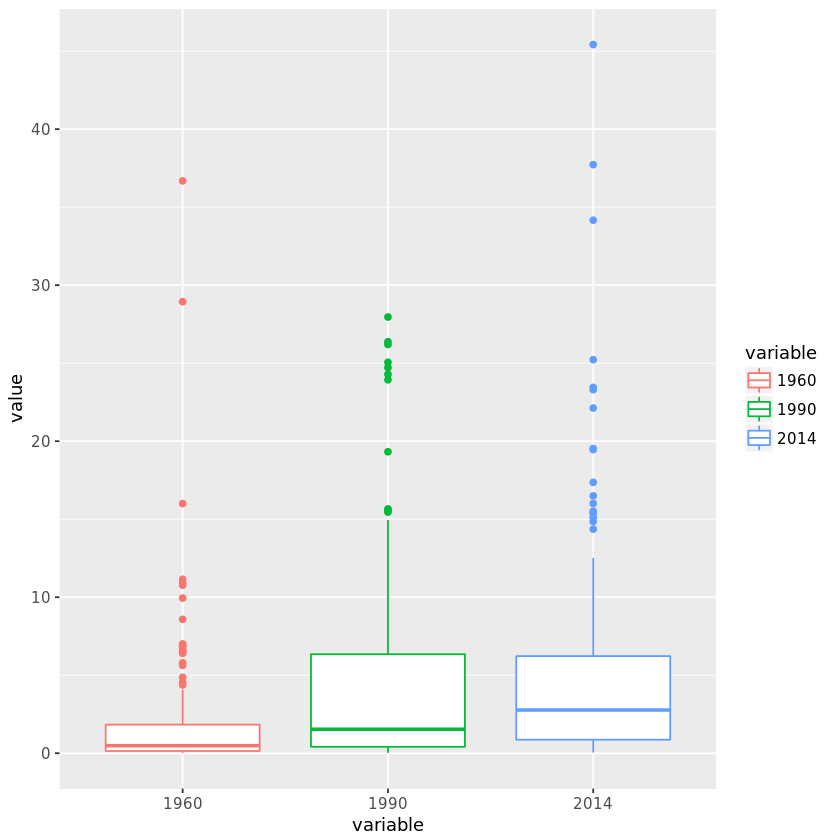

In [12]:
require(ggplot2)

df_CO2_PC_total <- merge(realCountryData,databank[databank$Indicator.Code == "EN.ATM.CO2E.PC",],by="Country.Code")[,c("Country.Code","1960","1990","2014")]
paste("Tenemos",nrow(df_CO2_PC_total),"paises")

head(df_CO2_PC_total)
print("Porcentaje de valores desconocidos")
round(colSums(is.na(df_CO2_PC_total[c("1960","1990","2014")])) / nrow(df_CO2_PC_total) * 100,2)
print("Tanto en 1960 como en 1990 hay muchos valores desconocidos")

mdf <- melt(df_CO2_PC_total,id="Country.Code")
head(mdf)
str(mdf)

ggplot(data=mdf,aes(x=variable,y=value,color=variable))+geom_boxplot()

Warning message:
“Removed 124 rows containing non-finite values (stat_bin).”

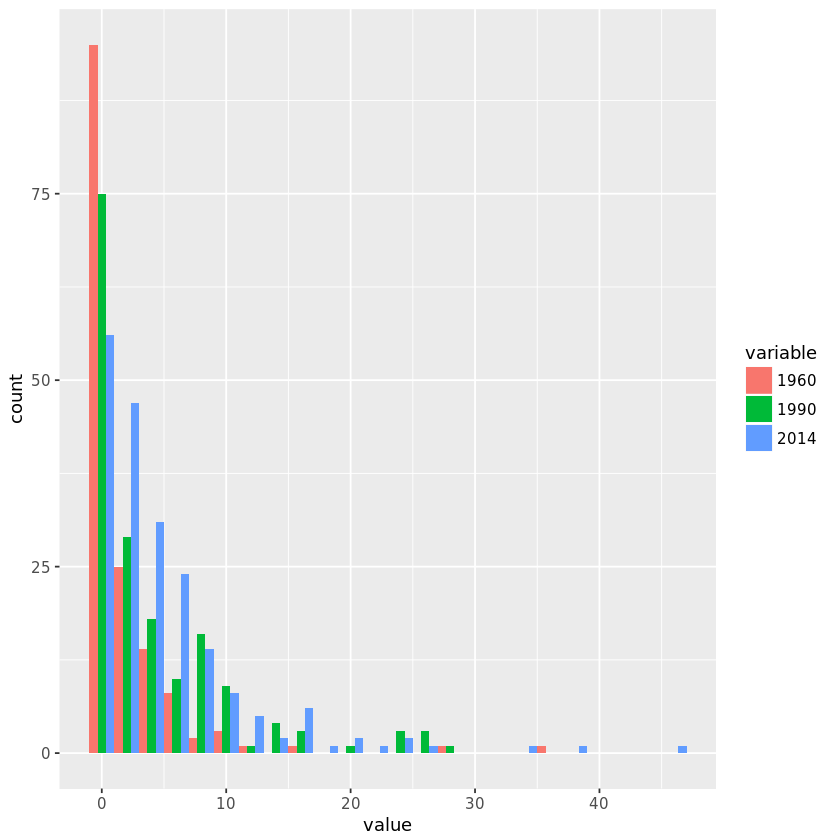

In [13]:
ggplot(data=mdf, aes(x=value, fill=variable)) +
    geom_histogram(binwidth=2,  position="dodge")

Using Country.Code as id variables
Warning message:
“Removed 124 rows containing non-finite values (stat_density).”

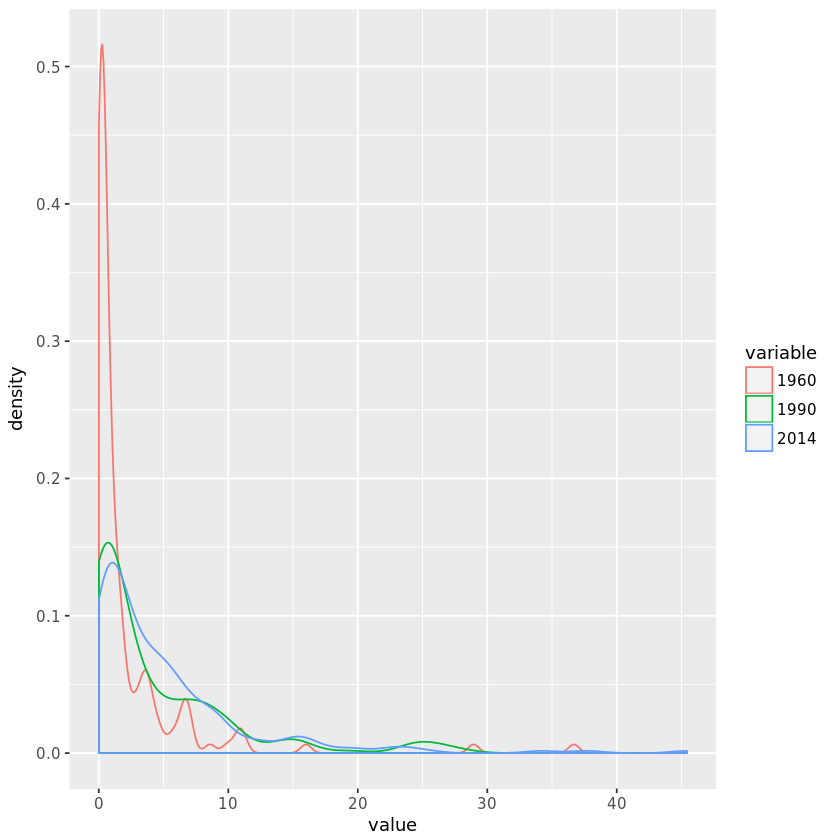

In [14]:
ggplot(data=melt(df_CO2_PC_total),aes(x=value,color=variable))+geom_density()

**En los tres gráficos se puede ver como en 1960 habia muchos paises que emitian poco y algunos (en cada punta) que emitian mas. En 1990 se añaden mas paises emisores y en el 2014 aumenta la media e incluso hay algunos paises que emiten muchísimo mas que el resto. De todas formas, al faltar muchos datos en los dos primeros grupos, solo podemos intuir la tendencia.**

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Warning message:
“Removed 80 rows containing missing values (geom_path).”

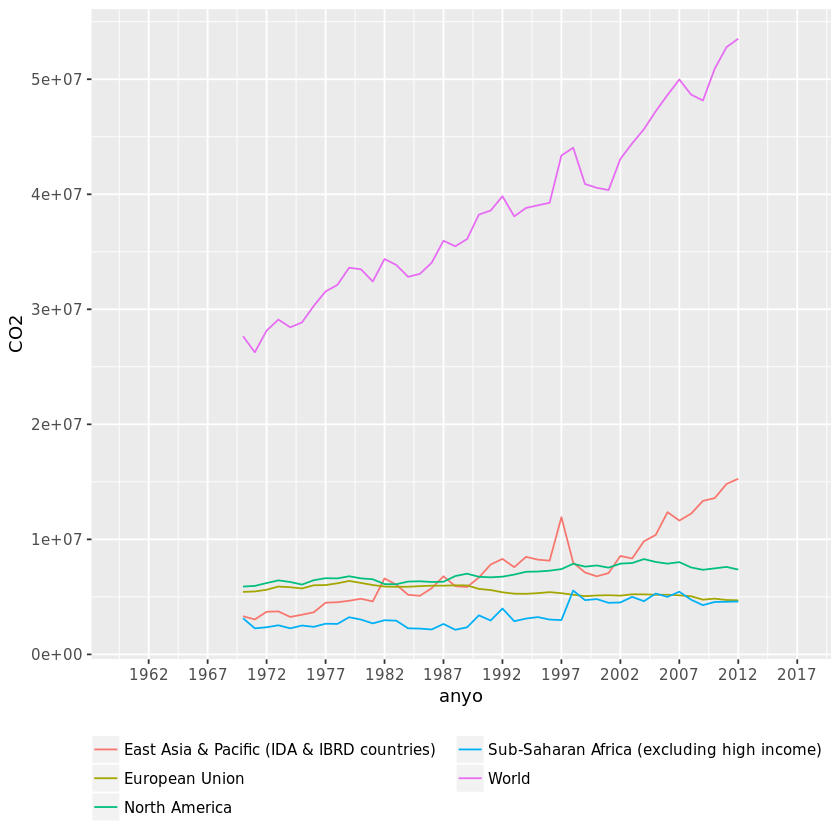

In [15]:
df2 <- databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE" & #"EN.ATM.CO2E.PC" & 
               databank$Country.Code %in% c("WLD","EUU","SSA","NAC","TEA"),
               c(1,5:ncol(databank))]

mdf2 <- melt(df2,id="Country.Name")
names(mdf2)[2] <- "anyo"
names(mdf2)[3] <- "CO2"

# Pasamos el anyo a formato fecha para poder escalar el gráfico y que se vean los años en el eje x
mdf2$anyo <- as.Date(paste(mdf2$anyo, 1, 1, sep = "-")) 

options(repr.plot.width=7,repr.plot.height=7)
ggplot(data=mdf2,aes(x=anyo,y=CO2,color=Country.Name,group=Country.Name)) + geom_line() +
     scale_x_date(date_breaks = "5 year", date_labels = "%Y") +
    guides(col = guide_legend(ncol = 2)) +
    theme(legend.position="bottom",legend.title=element_blank())

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

No id variables; using all as measure variables
Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_path).”Warning message:
“Removed 11 rows containing missing values (geom_path).”


Call:
lm(formula = CO2 ~ anyo, data = mdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-3819986 -1269567    55807  1215199  2991690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.111e+09  3.883e+07  -28.60   <2e-16 ***
anyo         5.772e+05  1.950e+04   29.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1587000 on 41 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.9553,	Adjusted R-squared:  0.9542 
F-statistic: 875.7 on 1 and 41 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2 ~ anyo + I(anyo^2) + I(anyo^3), data = mdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-2863263  -853699  -146184   909560  2778744 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.868e+12  1.028e+12  -2.790  0.00812 **
anyo         4.331e+09  1.549e+09   2.796  0.00798 **
I(anyo^2)   -2.181e+06  7.780e+05  -2.803  0.00784 **
I(anyo^3)    3.661e+02  1.303e+02   2.811  0.00769 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1279000 on 39 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.9724,	Adjusted R-squared:  0.9703 
F-statistic: 457.9 on 3 and 39 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2 ~ poly(anyo, 10), data = mdf)

Residuals:
     Min       1Q   Median       3Q      Max 
-2021373  -812089  -184889   650828  3122953 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)       -17957468   83730550  -0.214    0.832
poly(anyo, 10)1   853241621  960462700   0.888    0.381
poly(anyo, 10)2  -767407614 1167310352  -0.657    0.516
poly(anyo, 10)3   867231043 1035426640   0.838    0.408
poly(anyo, 10)4  -647125099  967556500  -0.669    0.508
poly(anyo, 10)5   587439294  669701846   0.877    0.387
poly(anyo, 10)6  -349886716  519908014  -0.673    0.506
poly(anyo, 10)7   262618462  271539132   0.967    0.341
poly(anyo, 10)8  -114216879  175221110  -0.652    0.519
poly(anyo, 10)9    66599499   56464467   1.179    0.247
poly(anyo, 10)10  -14186518   29792874  -0.476    0.637

Residual standard error: 1226000 on 32 degrees of freedom
  (15 observations deleted due to missingness)
Multiple R-squared:  0.9792,	Adjusted R-squared: 

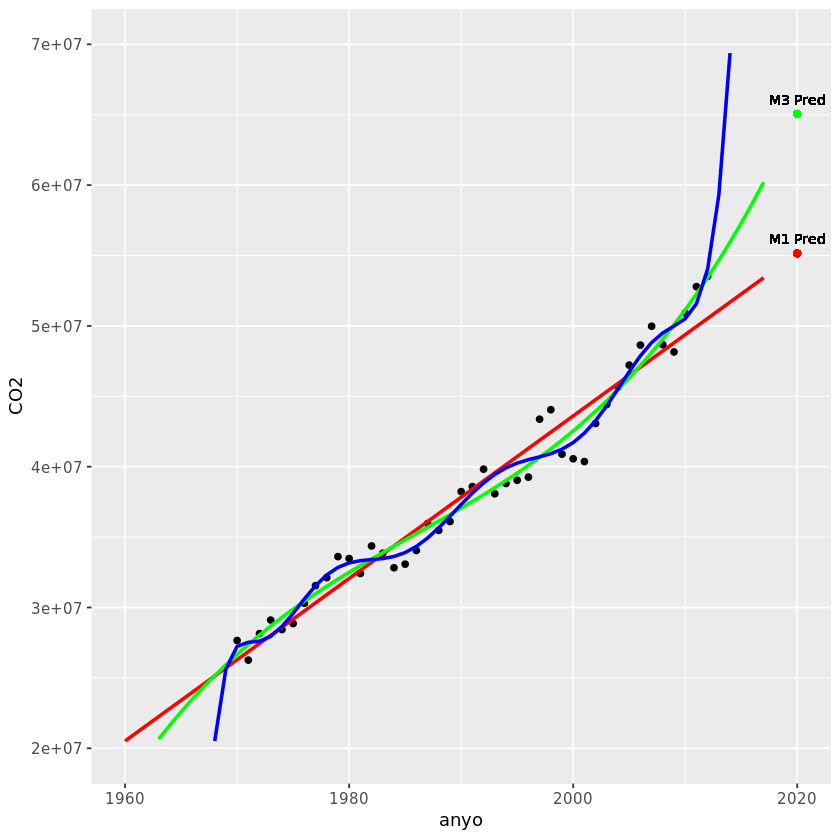

In [16]:
# Eliminamos la última columna de databank, ya que todos los valores son NA
dummy_col <- databank[ncol(databank)]
if (sum(is.na(dummy_col)) == nrow(databank)) {
    databank[ncol(databank)] <- NULL
}

# Seleccionamos los datos que nos interesan
df <- databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE" & #"EN.ATM.CO2E.PC" & 
               databank$Country.Code == "WLD",
               c(5:ncol(databank))]

mdf <- melt(df)
names(mdf)[1] <- "anyo"
names(mdf)[2] <- "CO2"
#mdf$anyo <- as.Date(paste(mdf$anyo, 1, 1, sep = "-")) 
mdf$anyo <- as.numeric(levels(mdf$anyo))[mdf$anyo]


# Creamos los modemos
model1 <-  lm(data=mdf,formula = CO2 ~ anyo)
model3 <-  lm(data=mdf,formula = CO2 ~ anyo + I(anyo^2) + I(anyo^3))
model10 <- lm(data=mdf,formula = CO2 ~ poly(anyo,10))

# realizamos la predicción según cada modelo
co2_predicted1 <- predict(model1,mdf)
co2_predicted3 <- predict(model3,mdf)
co2_predicted10 <- predict(model10,mdf)

m1_2020_predicted <- predict(model1,data.frame(anyo=2020))
m3_2020_predicted <- predict(model3,data.frame(anyo=2020))

# hacemos la gráfica
require(ggplot2)
# Tamaño del gráfico en Jupyter
options(repr.plot.width=7,repr.plot.height=7)

ggplot(data = mdf,aes(x=anyo,y=CO2)) + 
            geom_point() +
            geom_line(aes(y=co2_predicted1),color="red",lwd=1) +
            geom_line(aes(y=co2_predicted3),color="green",lwd=1) +
            geom_line(aes(y=co2_predicted10),color="blue",lwd=1) +
            ylim(2e7,7e7)+
            geom_point(aes(x=2020,y=m1_2020_predicted),color="red") +
            geom_point(aes(x=2020,y=m3_2020_predicted),color="green") +
            geom_text(x=2020,y=m1_2020_predicted+1e6,size=3,label="M1 Pred") +
            geom_text(x=2020,y=m3_2020_predicted+1e6,size=3,label="M3 Pred") 

# Analizamos los datos
sm1 <- summary(model1)
sm3 <- summary(model3)
sm10 <- summary(model10)

sm1
sm3
sm10


Mirando el grafico y por simple intuición diria que el modelo que mas se ajusta a los datos (sin que haya overfiting) es el del polinomio de grado 3.

Según los datos, el modelo con un R^2 ajustado mayor ( 0.972650064067055 ) es el modelo con el polinomio de grado 10.

Sin embargo la estimación de los coeficientes de la regresión lineal son mejores( tienen un p.value mucho mas bajo) que los del polinomio de grado 3 y mucho mejores que los del polinomio de grado 10

Debido a que tenemos pocos datos, cada uno tiene mucho peso en el modelo y como los coeficientes mejor estimados son los del modelo 1 (lineal) escojeré este para hacer la predicción.

**Haciendo pues la predicción para 2020 con el modelo 1, tendriamos una estimación de emisiones de CO2 de: 55152033.5459535 toneladas. Aun que seguramente seria un valor entre este último y el de m3: 65067658.6259766**

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [17]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [18]:
# Cargamos los datos del NOAA haciendo la media por años
df <- data.frame(year = co2ppm$year, co2 = co2ppm$interpolated)
co2_NOAA <- aggregate(x=df["co2"], by=list(anyo = df$year), FUN=mean)
names(co2_NOAA) <- c("anyo","CO2_Hawai")
head(co2_NOAA)

anyo,CO2_Hawai
1958,315.1889
1959,315.9742
1960,316.9075
1961,317.6375
1962,318.4508
1963,318.9942


No id variables; using all as measure variables


anyo,CO2_Mundial,CO2_Hawai
1960,9396706,316.9075
1961,9434403,317.6375
1962,9818840,318.4508
1963,10355747,318.9942
1964,10947007,319.6175
1965,11433442,320.0442


Warning message:
“Removed 3 rows containing missing values (geom_point).”

[1] "La correlacion entre CO2_Mundial y el CO2_Hawai es: 0.98455784385784"

,CO2_Mundial,CO2_Hawai
CO2_Mundial,1.0000000,0.9845578
CO2_Hawai,0.9845578,1.0000000


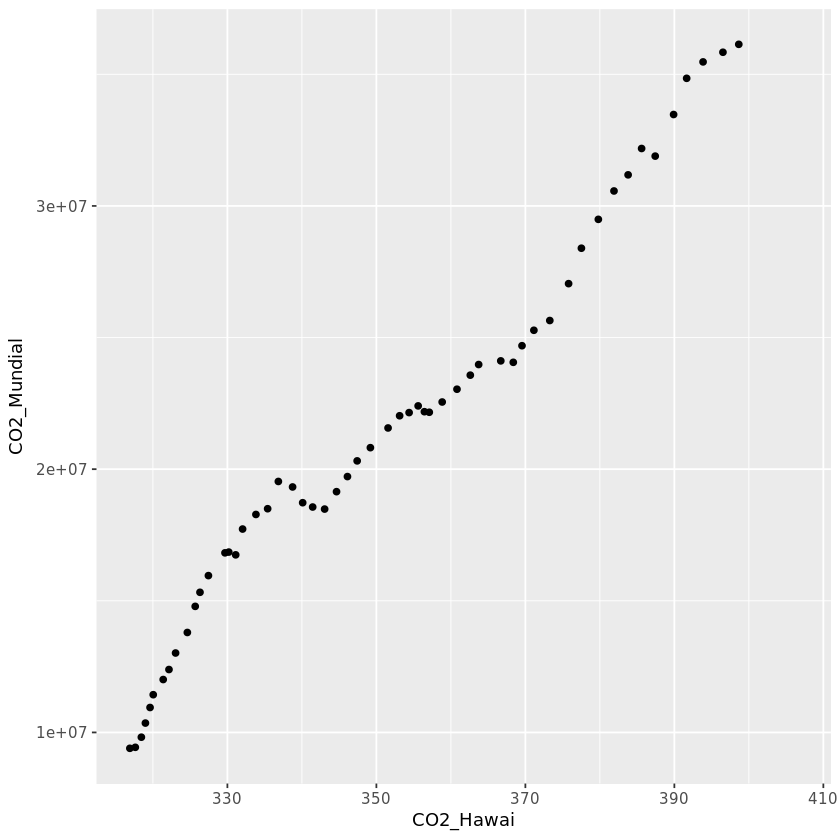

In [19]:
# Cargamos los datos de databank
df_databank <- databank[databank$Indicator.Code == "EN.ATM.CO2E.KT" &
               databank$Country.Code == "WLD",
               c(5:ncol(databank))]
mdf <- melt(df_databank)
names(mdf) <- c("anyo","CO2_Mundial")

# Cruzamos las dos tablas por año
data <- merge(mdf,co2_NOAA,by="anyo")
head(data)

# Dibujamos el gráfico de dispersión
ggplot(data=data,aes(x=CO2_Hawai,y=CO2_Mundial)) + geom_point()

# Calculamos la correlación
cor_matrix <- cor(data[2:3],use="complete.obs")
paste("La correlacion entre CO2_Mundial y el CO2_Hawai es:",cor_matrix[1,2])
cor_matrix

**Observamos una correlacion muy alta entre CO2_Mundial y el CO2_Hawai de: 0.98455784385784 **

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [20]:
# A la correlación anterior le añadimos los datos de la temperatura mínima en Praga
min_temp <- weatherPraga[,c("DATE","EMNT")]
names(min_temp)[1] <- "anyo"
data2 <- merge(data,min_temp,by="anyo")
head(data2)
print("Correlación:")
cor(data2[,2:4])

anyo,CO2_Mundial,CO2_Hawai,EMNT
1960,9396706,316.9075,-16.8
1961,9434403,317.6375,-16.7
1962,9818840,318.4508,-14.9
1963,10355747,318.9942,-17.4
1964,10947007,319.6175,-17.1
1965,11433442,320.0442,-9.8


[1] "Correlación:"


,CO2_Mundial,CO2_Hawai,EMNT
CO2_Mundial,1.0000000,0.9703198,0.2254552
CO2_Hawai,0.9703198,1.0000000,0.1783153
EMNT,0.2254552,0.1783153,1.0000000


Vemos que hay muy poca correlación entre la temperatura mínima en praga y el CO2 en la atmósfera de Hawai.
Hay algo mas de correlación entre la temperatura mínima en Praga y las emisiones a nivel mundial de CO2